# Coastal Systems Notebook 2 (week 3): The Tide

In chapter 3 of the book and slides, we learned that the tide is generated through the interplay between gravitational attraction forces in the Earth-Moon and Earth-Sun systems respectively. In this notebook we will explore these concepts in a more interactive way, with some exercises, visualizations, and code. We will not repeat the whole theory, however, so make sure you have followed the lectures for this week and read the relevant pages in chapter 3 of the book.

We will explore the different aspects of teh tide through this Jupyter notebook and use python to create figures, make computations, and analyse data. So, please make sure you activate the coastal environment before running the notebook. Then run the cell below, where we import the packages used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import ipywidgets as widgets

## 1. The equilibrium tide

First we will have a look at the generation of the tide. To start, we are gonna look at the gravitational forces between the earth, moon, and sun. As you have learned, the tide is generated by the so-called *differential pull*, meaning the difference in gravitational pull on water masses at different locations on the Earth. To make calculations, we first need a function that can compute the gravitational pull between two celestial bodies (e.g. the Earth and Moon).

In [2]:
### Functions
def grav_pull(m1, m2, d):
    """
    This function calculates the gravitational pull between two celestial bodies using Newton's law of universal gravitation.

    Parameters:
    m1 (float): mass of the first body in kg.
    m2 (float): mass of the second body in kg.
    d (float): distance between the two bodies in meters.

    Returns:
    g_pull (float): the gravitational pull between the two bodies in g

    """
    G = 6.67408e-11  # universal gravitational constant
    g = 9.81         # gravitational acceleration on the Earth
    g_pull = G * (m1 * m2) / d**2 / g # here we divide by g, so we get the gravitational pull in terms of g
    return g_pull

The above function computes the gravitational pull between two celestial bodies. We can now use it to compute the forces between the earth and the sun/moon. Find the required values and fill them in below and then run the function, which will show you the forces.

In [3]:
m_earth = 1         # mass of the earth in kg (we use 1 to compute the gravitational pull per kg of earth mass)
m_sun   = 1.99e30   # mass of the sun in kg
m_moon  = 7.35e22   # mass of the moon in kg
d_sun   = 1.5e11    # distance between the centers of the sun and earth in meters
d_moon  = 3.84e8    # distance between the centers of the moon and earth in meters
r       = 6.37e6    # radius of the Earth in meters

# Now we compute the gravitational pull and print them
gp_sun = grav_pull(m_earth, m_sun, d_sun)
gp_moon = grav_pull(m_earth, m_moon, d_moon)

print("Gravitational pull from the Sun on the center of Earth:  %.2E g"%gp_sun)
print("Gravitational pull from the Moon on the center of Earth: %.2E g"%gp_moon)

Gravitational pull from the Sun on the center of Earth:  6.02E-04 g
Gravitational pull from the Moon on the center of Earth: 3.39E-06 g


As we can see, the gravitational pull of the sun is about two orders of magnitude larger than that of the moon, and both are much smaller than g. Yet, we know that these forces are somehow responsible for tidal ranges of multiple meters, and that the moon is actually responsible for about 70% of these tides. How come? As we can see in the formula, the gravitational pull is strongly dependent on the distance between the two celestial bodies. Moreover, since the Earth is a sphere, different locations on the Earth's surface will experience subtle differences in the gravitational pull, as the distance to the Sun/Moon varies slightly over the Earths surface. Let's use the above function to compute the gravitational pull from the Moon at different locations around the Earth.

=> @DANIEL: here we need a visualization plot for the forces. So something similar to figure 3.17 in the book (p.124). Could you make that? for now you can just put one arrow with the computed force at the center of the earth. I think you can use the matplotlib extension 'patches' to plot polygons / circles etc.: https://matplotlib.org/stable/api/patches_api.html



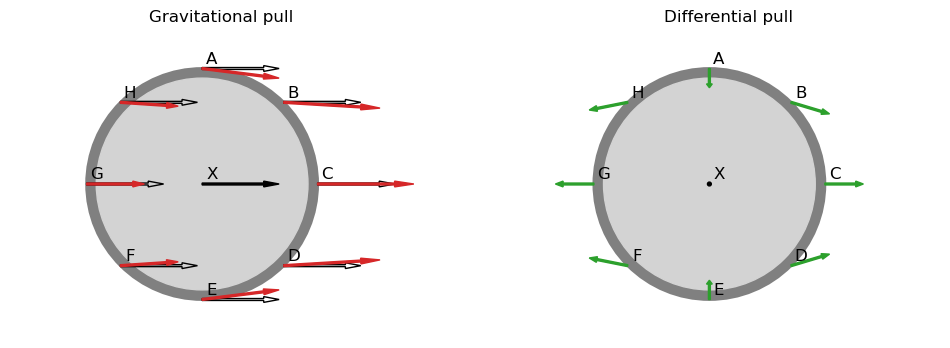

In [4]:
### VISUAIZATION FIGURE GRAV PULL
fig, axs = plt.subplots(1,2, figsize=(12,4))

# Adding outer and inner circles
circ_out = mpatches.Circle((0,0),0.3, fill = True,color='grey',linewidth = 2)
circ_in = mpatches.Circle((0,0),0.275, fill = True, color = 'lightgrey')
circ_c = mpatches.Circle((0,0),0.005, fill = True, color = 'black')
axs[0].add_patch(circ_out)
axs[0].add_patch(circ_in)
axs[1].add_patch(mpatches.Circle((0,0),0.3, fill = True,color='grey',linewidth = 2))
axs[1].add_patch(mpatches.Circle((0,0),0.275, fill = True, color = 'lightgrey'))
axs[1].add_patch(circ_c)


# Arrow coordinates per position
positions = {
        'X':    [0, 0, 0.2, 0],
        'A':    [0, 0.3, 0.2, -0.025],
        'B':    [0.3*np.cos(45*np.pi/180), 0.3*np.cos(45*np.pi/180), 0.25, -0.015],
        'C':    [0.3, 0, 0.25, 0],
        'D':    [0.3*np.cos(45*np.pi/180),-0.3*np.cos(45*np.pi/180), 0.25, 0.015],
        'E':    [0, -0.3, 0.2, 0.025],
        'F':    [-0.3*np.cos(45*np.pi/180),-0.3*np.cos(45*np.pi/180), 0.15, 0.01],
        'G':    [-0.3, 0, 0.15, 0],
        'H':    [-0.3*np.cos(45*np.pi/180),0.3*np.cos(45*np.pi/180), 0.15, -0.01],
}

for pos in positions:
        # Center of the Earth
        if pos == 'X':
                axs[0].add_patch(mpatches.Arrow(*positions[pos],width=0.025, color='k'))   
        
        # Other positions
        else:
                # Gravitational pull
                axs[0].add_patch(mpatches.Arrow(*positions[pos][0:2], 0.2, 0, width=0.025, edgecolor='k', facecolor='None'))    # GP at center of Earth
                axs[0].add_patch(mpatches.Arrow(*positions[pos],width=0.025, color='C3'))                                          # GP at each individual location

                # Differential pull
                diffpull = list(2*(np.array(positions[pos][2:]) - np.array(positions['X'][2:])))        # Subtract th GP at the center from the other locations
                axs[1].add_patch(mpatches.Arrow(*positions[pos][0:2], *diffpull, width=0.025, color='C2'))

# Adding center and text
titles = ['Gravitational pull', 'Differential pull']
for i in range(len(axs)):
        for pos in positions:
                coords = [x + 0.025 for x in positions[pos][0:2]]
                axs[i].text(*coords,pos, fontsize=12, ha='center', va='center')
        axs[i].axis('equal')
        axs[i].axis('off')
        axs[i].set_xlim(-0.6,0.7)
        axs[i].set_ylim(-0.4,0.4)
        axs[i].set_title(titles[i])

In [5]:
# Trying to get the magnitude and directions of the gravitational pull for all points.
# gp_moon_X = grav_pull(m_earth, m_moon, d_moon) # gravitational pull from the Moon on the center of the Earth
# gp_moon_A_E = grav_pull(m_earth, m_moon, np.sqrt(r**2+d_moon**2)) # gravitational pull from the Moon to points A and E (same magnitude different direction)
# dist_B_D = np.sqrt((r*np.sin(45*np.pi/180))**2 + (d_moon-r*np.cos(45*np.pi/180))**2)
# gp_moon_B_D = grav_pull(m_earth, m_moon, dist_B_D) # gravitational pull from the Moon to points H and F (same magnitude different direction)
# dist_H_F = np.sqrt((r*np.sin(45*np.pi/180))**2 + (r*np.cos(45*np.pi/180)+d_moon)**2)
# gp_moon_H_F = grav_pull(m_earth, m_moon, dist_H_F) # gravitational pull from the Moon to points H and F (same magnitude different direction)
# gp_moon_G = grav_pull(m_earth, m_moon, d_moon+r) # gravitational pull from the Moon to point G
# gp_moon_C= grav_pull(m_earth, m_moon, d_moon-r) # gravitational pull from the Moon to point C
# ang_A_E = np.arccos(d_moon/np.sqrt(r**2+d_moon**2))   # angle between point A and moon.
# dx,dy = gp_moon_A_E*np.cos(ang_A_E), gp_moon_A_E*np.sin(ang_A_E)


![viz_fig](IMG_5679.png)

We also know that the gravitational pull is responsible for the Earth's rotation around the Sun (and the Moon's around the Earth). However, if the gravitational pull varies over Earth's body, that would imply that the rotation of the Earth also differs. Yet, we know that the Earth rotates around the Sun as a whole. Apparently, the Earth compensates these subtle differences in gravitational pull so it can rotate around the Sun as one body. The water masses on the surface of the solid Earth, however, can move around and are not as fixed and rigid as the solid land masses. So, while the differential pull is absorbed by the solid mass of the Earth, its water masses are moved around by these subtle differences in gravitational pull.

Let's assume that the Earth's rotation is based on the gravitational pull that acts on its center, which will be our reference pull. For the other locations aroundt the Earth, we will compute the difference to the reference pull, by subtracting the reference pull from the gravitational pull at each location.

=> @DANIEL Here similar figure but then with the diff pull  **It was added above. Should I divide the previous figure, leave the gravitational pull above and put the differential pull figure below?**

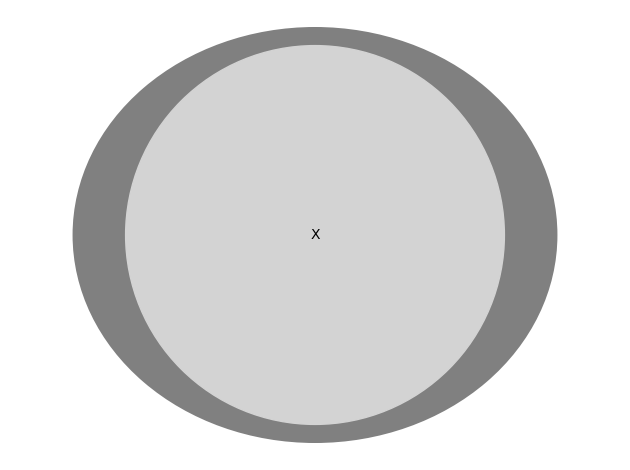

In [6]:
### VISUALIZATION FIGURE DIFF PULL

fig, ax = plt.subplots()

# Adding outer and inner circles
ellipse_out = mpatches.Ellipse((0,0),width=0.7,height=0.6, fill = True, color='grey', linewidth = 2)
circ_in = mpatches.Circle((0,0),0.275, fill = True, color = 'lightgrey')
ax.add_patch(ellipse_out)
ax.add_patch(circ_in)


# Adding center and text
ax.text(0,0,'X',horizontalalignment='center',
        verticalalignment='center')

plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()


As we can see ow, the differential pull due to the moon is actually larger than for the Sun. can you explain why this might be? 

Still, the magnitude of either differential pull is negligible compared to the Earths own gravitational attraction (g), meaning that the components directed from/towards Earth's center can be neglected. It is the tangential components who create the tide, by moving the water around the surface of the Earth. This results in the two bulge of water at either side of the Earth, in line with the Sun/Moon. Hence, if the Sun and Moon are aligned in one line, the forces enhance each other and we get spring tide (larger tidal range). On the other hand, if they are perpendicular to each other, the lunar and solar differential cancel each other out and we get a less pronounced tide (neap tide).

...

## 2. Tidal constituents

In the above exercise, we looked at the generation of an equilibrium tide for an Earth that is entirely covered by water, and who's gravitational field is only affected by itself, the Sun, and the Moon. In reality, our planet has continents, oceans with varying water depths, and a complex gravitational field. Hence the tidal signals we actually observe around the planet are more complex as well. Fortunately, we can break them down into multiple harmonic components, called *tidal constituents*. These can either be diurnal, semi-diurnal, short-, or long-period constituents. Each constituent is characterized by an amplitude, frequency and phase, and individually looks like a smooth sin/cosine curve. When we sum up all the individual components we get complex tidal signals, with spring-neap cycles, daily inequalities, and longer-term variations. To visualize this, we will compute the tidal signal at four different locations around the World: Scheveningen (Netherlands), Rio de Janeiro (Brazil), Galveston (Texas USA), and Jakarta (Indonesia). To do this, we will use six harmonic components: M2, S2, K1, O1, M4, and Mf. Section 3.7.6. in the book gives some more information on each constituent.

In [7]:
### Functions
def harmonic(a, phi, f, t):
    """
    This function calculates the value of a harmonic function at a given time t.

    Parameters:
    a (float): amplitude of the harmonic function.
    phi (float): phase angle of the harmonic function.
    f (float): frequency of the harmonic function.
    t (float): time at which the function is evaluated.

    Returns:
    float: the value of the harmonic function at the given time.
    """
    return a * np.cos(f*t-phi)


Now, below we load the data (phase and amplitude of each component) and plot the tidal signal for each location. For each location, the individual components are plotted (upper plot, colors) and then the combined tidal signal (lower plot, black). In the *comps* dictionary below, you can comment/uncomment the lines with each component, to in/exlude them in the figure. This way you can play around with the different components and see what kind of signal you get. Try to answer the following questions:

1. Start with only the first two components: M2 and S2. What longer term variation can you detect when looking at the combined signal of these two?

2. Now, what if you take only the diurnal components, K1 and O1. What is the main difference to the signal from before? Can you still detect the fortnightly variation?

3. Use one semi-diurnal and one diurnal component (e.g. M2 and K1). What do phenomenon can we observe now? Does it happen at all the locations?

4. Activate only the M2 and M4 components and take a look at Scheveningen. What do you see there? Can you explain this?

5. Now activate all six components and analyse the combined signals. <br>
    5.1. What are the dominant components at each location? <br>
    5.2. How would you categorize the four locations with regards to (semi)diurnality? Take a look at Figure 4.12 in the book (p. 166). Does it agree with what you can see below?



> **First option: Only playing with xlim**
- Problem: It doesn't show the plot directly (at least in Jupyter Notebook, in VS code it works), you have to play with the bar (I will keep looking).

In [8]:
# Tidal components and their angular frequencies (numer to the right is the period in hours)
# Comment / uncomment to select the contituents that are plotted
comps = {
    'M2'    :   [2*np.pi / 12.42, 'C0'],    # Principal lunar semidiurnal
    'S2'    :   [2*np.pi / 12, 'C1'],       # Principal solar semidiurnal
    'K1'    :   [2*np.pi / 23.93, 'C2'],    # Lunar-solar declinational diurnal
    'O1'    :   [2*np.pi / 25.82, 'C3'],    # Principal lunar diurnal
    'M4'    :   [2*np.pi / 6.21, 'C4'],     # First shallow water lunar overtide
    'Mf'    :   [2*np.pi / 327.9, 'C5'],    # Lunisolar fortnightly period
}

# List of the tidal components
list_comp = [comp for comp in comps]

# Time window for which we will compute the tidal components. t is in hours so for one month we use around 300 hours (Wouldn't it be 720 hrs?). 
t = np.linspace(0,338,1000)

# First we load the data (tidal constituents) into a dictionary so that we have one dataframe for each constituent (M2, S2, ...)
tide = {}
for comp in comps.keys():
    tide[comp] = pd.read_pickle('data/%s.p'%comp)

# Locations that we will plot
locs = ['Scheveningen', 'Rio de Janeiro', 'Galveston', 'Jakarta']


range_slider = widgets.FloatRangeSlider(
    value=[0, np.max(t)],
    min=np.min(t), max=np.max(t) , step=0.1,
    description='xlim:',
    readout_format='.1f',
)

def plot(lims_x_axis):
    

    # Now we plot for each location a plot with the individual components and a plot for the total tidal water level
    fig, axs = plt.subplots(4,2, sharex=True, figsize=(15,8))
    ax = axs.flatten()
    
    for i,j in zip(range(len(locs)), [0,1,4,5]):
        harms = {}
        for comp in comps.keys():
            # Store data for current component in temporary numpy array
            temp = tide[comp][tide[comp].index == locs[i].lower()].to_numpy()[0]

            # Use harmonic() to compute each harmonic constituent
            harms[comp] = harmonic(temp[3], temp[2], comps[comp][0], t)            

            # Plot each individual constituent in the upper subplot  
            ax[j].plot(t,harms[comp], '-', linewidth=1, c=comps[comp][1])

        # Plot the sum of the selected constituents in the lower subplot
        ax[j+2].plot(t,sum([harms[comp] for comp in comps.keys()]),'k')

        # Axis settings
        #ax[j].set_xlim(t[0],t[-1])
        ax[j].set_xlim(lims_x_axis)
        # ax[i].set_ylim(-2,2)
        ax[j].set_title(locs[i])

    ax[6].set_xlabel('Time [h]')
    ax[2].set_ylabel('Tidal elevation [cm]')

    list_comp = [comp for comp in comps]
    empty_str = [str('_nolegend_') for comp in comps]
    list_comp += empty_str
    list_comp += ['Sum of components']

    fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)

    plt.tight_layout()
    
    
widgets.interact(plot,lims_x_axis = range_slider)

interactive(children=(FloatRangeSlider(value=(0.0, 338.0), description='xlim:', max=338.0, readout_format='.1f…

<function __main__.plot(lims_x_axis)>

> **Second option: Playing with xlim and with the tidal constituents**
- Problem: The piece of code will be larger and I will have to spend more time looking into the problems that might pop up.

In [9]:
# Tidal components and their angular frequencies (numer to the right is the period in hours)
# Comment / uncomment to select the contituents that are plotted
comps = {
    'M2'    :   [2*np.pi / 12.42, 'C0'],    # Principal lunar semidiurnal
    'S2'    :   [2*np.pi / 12, 'C1'],       # Principal solar semidiurnal
    'K1'    :   [2*np.pi / 23.93, 'C2'],    # Lunar-solar declinational diurnal
    'O1'    :   [2*np.pi / 25.82, 'C3'],    # Principal lunar diurnal
    'M4'    :   [2*np.pi / 6.21, 'C4'],     # First shallow water lunar overtide
    'Mf'    :   [2*np.pi / 327.9, 'C5'],    # Lunisolar fortnightly period
}

# List of the tidal components
list_comp = [comp for comp in comps]

# Time window for which we will compute the tidal components. t is in hours so for one month we use around 300 hours (Wouldn't it be 720 hrs?). 
t = np.linspace(0,338,1000)

# First we load the data (tidal constituents) into a dictionary so that we have one dataframe for each constituent (M2, S2, ...)
tide = {}
for comp in comps.keys():
    tide[comp] = pd.read_pickle('data/%s.p'%comp)

# Locations that we will plot
locs = ['Scheveningen', 'Rio de Janeiro', 'Galveston', 'Jakarta']


range_slider = widgets.FloatRangeSlider(
    value=[0, np.max(t)],
    min=np.min(t), max=np.max(t) , step=0.1,
    description='xlim:',
    readout_format='.1f',
)

M2 = widgets.Checkbox(description='M2',style={'description width':'initial'})
S2 = widgets.Checkbox(description='S2',style={'description width':'initial'})
K1 = widgets.Checkbox(description='K1',style={'description width':'initial'})
O1 = widgets.Checkbox(description='O1',style={'description width':'initial'})
M4 = widgets.Checkbox(description='M4',style={'description width':'initial'})
Mf = widgets.Checkbox(description='Mf',style={'description width':'initial'})

box_layout = widgets.Layout(display='inline-flex',
                              flex_flow = 'row',
                              align_items = 'stretch',
                              botder = 'solid',
                              width = '100%')

ui = widgets.HBox([M2,S2,K1,O1,M4,Mf],layout = box_layout)


def plot(lims_x_axis):
    
    # Now we plot for each location a plot with the individual components and a plot for the total tidal water level
    fig, axs = plt.subplots(4,2, sharex=True, figsize=(15,8))
    ax = axs.flatten()
    
    for i,j in zip(range(len(locs)), [0,1,4,5]):
        harms = {}
        for comp in comps.keys():
            # Store data for current component in temporary numpy array
            temp = tide[comp][tide[comp].index == locs[i].lower()].to_numpy()[0]

            # Use harmonic() to compute each harmonic constituent
            harms[comp] = harmonic(temp[3], temp[2], comps[comp][0], t)            

            # Plot each individual constituent in the upper subplot  
            ax[j].plot(t,harms[comp], '-', linewidth=1, c=comps[comp][1])

        # Plot the sum of the selected constituents in the lower subplot
        ax[j+2].plot(t,sum([harms[comp] for comp in comps.keys()]),'k')

        # Axis settings
        #ax[j].set_xlim(t[0],t[-1])
        ax[j].set_xlim(lims_x_axis)
        # ax[i].set_ylim(-2,2)
        ax[j].set_title(locs[i])

    ax[6].set_xlabel('Time [h]')
    ax[2].set_ylabel('Tidal elevation [cm]')

    list_comp = [comp for comp in comps]
    empty_str = [str('_nolegend_') for comp in comps]
    list_comp += empty_str
    list_comp += ['Sum of components']

    fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)

    plt.tight_layout()
    

widgets.interact(plot,lims_x_axis = range_slider)

out = widgets.interactive_output(plot,{'M2':M2,'S2':S2})


display(ui,out)



interactive(children=(FloatRangeSlider(value=(0.0, 338.0), description='xlim:', max=338.0, readout_format='.1f…

Output()

> **Not interactive one**

<IPython.core.display.Javascript object>


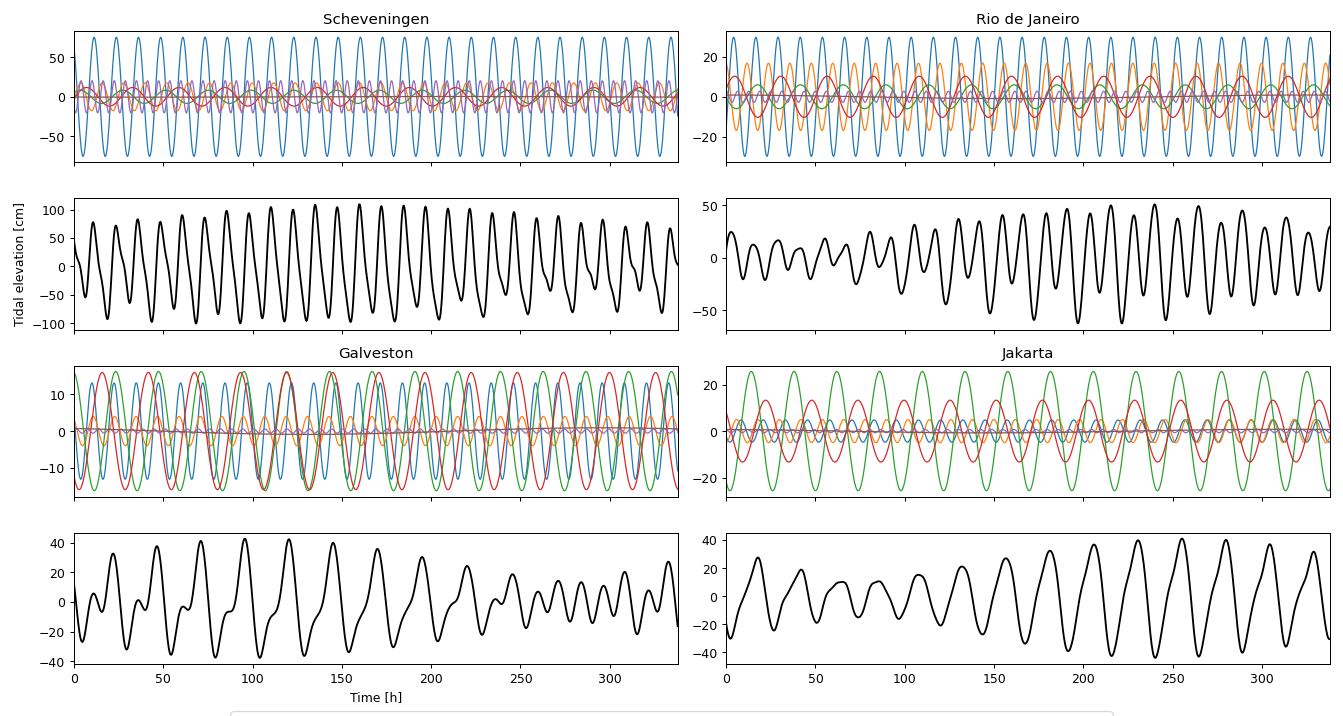

/tmp/ipykernel_1533/1344865124.py:55: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f7005ea0760> starts with '_'. It is thus excluded from the legend.
  fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)
/tmp/ipykernel_1533/1344865124.py:55: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f7005ea0a00> starts with '_'. It is thus excluded from the legend.
  fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)
/tmp/ipykernel_1533/1344865124.py:55: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f7005ea0ca0> starts with '_'. It is thus excluded from the legend.
  fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)
/tmp/ipykernel_1533/1344865124.py:55: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f7005ea0f40> starts with

In [68]:
# Tidal components and their angular frequencies (numer to the right is the period in hours)
# Comment / uncomment to select the contituents that are plotted
comps = {
    'M2'    :   [2*np.pi / 12.42, 'C0'],    # Principal lunar semidiurnal
    'S2'    :   [2*np.pi / 12, 'C1'],       # Principal solar semidiurnal
    'K1'    :   [2*np.pi / 23.93, 'C2'],    # Lunar-solar declinational diurnal
    'O1'    :   [2*np.pi / 25.82, 'C3'],    # Principal lunar diurnal
    'M4'    :   [2*np.pi / 6.21, 'C4'],     # First shallow water lunar overtide
    'Mf'    :   [2*np.pi / 327.9, 'C5'],    # Lunisolar fortnightly period
}

# Time window for which we will compute the tidal components. t is in hours so for one month we use around 300 hours (Wouldn't it be 720 hrs?). 
t = np.linspace(0,338,1000)

# First we load the data (tidal constituents) into a dictionary so that we have one dataframe for each constituent (M2, S2, ...)
tide = {}
for comp in comps.keys():
    tide[comp] = pd.read_pickle('data/%s.p'%comp)

# Locations that we will plot
locs = ['Scheveningen', 'Rio de Janeiro', 'Galveston', 'Jakarta']

# Now we plot for each location a plot with the individual components and a plot for the total tidal water level
fig, axs = plt.subplots(4,2, sharex=True, figsize=(15,8))
ax = axs.flatten()

for i,j in zip(range(len(locs)), [0,1,4,5]):
    harms = {}
    for comp in comps.keys():
        # Store data for current component in temporary numpy array
        temp = tide[comp][tide[comp].index == locs[i].lower()].to_numpy()[0]

        # Use harmonic() to compute each harmonic constituent
        harms[comp] = harmonic(temp[3], temp[2], comps[comp][0], t)            

        # Plot each individual constituent in the upper subplot  
        ax[j].plot(t,harms[comp], '-', linewidth=1, c=comps[comp][1])

    # Plot the sum of the selected constituents in the lower subplot
    ax[j+2].plot(t,sum([harms[comp] for comp in comps.keys()]),'k')

    # Axis settings
    ax[j].set_xlim(t[0],t[-1])
    # ax[i].set_ylim(-2,2)
    ax[j].set_title(locs[i])

ax[6].set_xlabel('Time [h]')
ax[2].set_ylabel('Tidal elevation [cm]')

list_comp = [comp for comp in comps]
empty_str = [str('_nolegend_') for comp in comps]
list_comp += empty_str
list_comp += ['Sum of components']

fig.legend(list_comp, loc='lower center', ncol=len(list_comp), bbox_to_anchor=(0.5,-0.05),fontsize=14)

plt.tight_layout()

As you can see, the different components all interact with each other to form complex time varying tidal signals, which can be very different around the globe. In the example above we included six tidal constituents. However, the most advanced tidal models currently predict tides using up to 34 different tidal constituents. The figure below shows an example of the total tidal signal in Galveston, from the FES2014 tidal model, using 34 constituents. Can you see strong differences with the signal we compute for Galveston above?

![tide_galveston](fes_tide_prediction_sep_dec_2023.png)

## 3. Propagation of the tide

...

### Backend

The following is not part of the student notebook but of the backend for developing the NB

In [17]:
### DATA
import xarray as xr
from os.path import join

path = '/Users/jakobchristiaa/Documents/TU Delft/PhD Turtle Beaches/git_repos/aviso-fes/data/fes2014/ocean_tide_extrapolated'
comps = ['m2', 's2', 'm4', 'o1', 'k1', 'mf']
locs = {
    'scheveningen'  :   [52.125, 4.25], #lat, lon
    'cardiff'       :   [51.5, -3.125],
    'rio de janeiro':   [-23, -43.125],
    'galveston'     :   [29.25, -94.6875],
    'jakarta'       :   [-5.8125, 106.8125],
}

tide = {}

# Extract constituents from FES2014 and store pickle files
for comp in comps:
    data = xr.open_dataset(join(path, comp + '.nc'))
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    
    # tide[comp] = pd.DataFrame(columns=)
    temp = {}

    for loc in locs.keys():
        temp[loc] = (data.sel(lat=locs[loc][0],lon=locs[loc][1])
        .to_dataframe()
        .drop(['lat_bnds', 'lon_bnds', 'crs'], axis=1)
        .drop(1)
        .assign(place=loc)
        .set_index('place', drop=True)
    )

    tide[comp] = pd.concat(temp.values())
    tide[comp].to_pickle('data/%s.p'%comp)

ModuleNotFoundError: No module named 'xarray'